# Task 1

---
1. Scrape data from the web

The first thing to do is to scrape review data from the web. To do this, you should use a website called Skytrax.

The team leader wants you to focus on reviews, specifically about the airline itself. You should collect as much data as you can in order to improve the output of your analysis. To get started with the data collection, you can use the “Jupyter Notebook” in the Resources section below to run some Python code that will help to collect some data. 

Analyse data

Once you have your dataset, you need to prepare it. The data will be very messy and will contain purely text. You will need to clean the data in order to prepare it for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews. Python is recommended to complete this task; however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.

Please ensure that you have created a folder called “data” and mapped your file path.

Present insights

Your manager would like you to summarise your findings within a single PowerPoint slide so that they can present the results at the next board meeting. You should create visualisations and metrics to include within this slide, as well as clear and concise explanations, in order to quickly provide the key points from your analysis. Use the “PowerPoint Template” provided to complete the slide.
### Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Check in was smooth enough. Bo...
1,✅ Trip Verified | Although transferring to thi...
2,✅ Trip Verified | We are extremely grateful ...
3,✅ Trip Verified | I had an appalling experie...
4,"Not Verified | Good points, the cabin crew, t..."


In [4]:
df.to_csv(r"C:\Users\Aditi\OneDrive\Documents\Desktop\BA_Review_Analysis\data.csv", index=False)


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.head()

,reviews
0,Not Verified | Check in was smooth enough. Bo...
1,✅ Trip Verified | Although transferring to thi...
2,✅ Trip Verified | We are extremely grateful ...
3,✅ Trip Verified | I had an appalling experie...
4,"Not Verified | Good points, the cabin crew, t..."


In [6]:
# Remove "✅ Trip Verified" and "Not Verified" from the start of each review
df['reviews'] = df['reviews'].str.replace("✅ Trip Verified |", "", regex=False)
df['reviews'] = df['reviews'].str.replace("Not Verified |", "", regex=False)


In [7]:
df.head()

,reviews
0,Check in was smooth enough. Boarding was cha...
1,Although transferring to this flight through ...
2,We are extremely grateful to the crew of fl...
3,I had an appalling experience with British ...
4,"Good points, the cabin crew, they were helpf..."


In [8]:
# remove leading/trailing whitespace
df['reviews'] = df['reviews'].str.strip()
df.head()

,reviews
0,Check in was smooth enough. Boarding was chaot...
1,Although transferring to this flight through H...
2,We are extremely grateful to the crew of fligh...
3,I had an appalling experience with British Air...
4,"Good points, the cabin crew, they were helpful..."


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_reviews'] = df['reviews'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
#Use TextBlob for sentiment polarity scoring.
from textblob import TextBlob

df['polarity'] = df['clean_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


In [11]:
df.head()

,reviews,clean_reviews,polarity,sentiment
0,Check in was smooth enough. Boarding was chaot...,Check smooth enough Boarding chaotic We herded...,0.054167,Positive
1,Although transferring to this flight through H...,Although transferring flight Heathrow Budapest...,0.311364,Positive
2,We are extremely grateful to the crew of fligh...,We extremely grateful crew flight BA Cape Town...,0.078333,Positive
3,I had an appalling experience with British Air...,I appalling experience British Airways It star...,-0.055642,Negative
4,"Good points, the cabin crew, they were helpful...",Good point cabin crew helpful professional mat...,0.047050,Positive


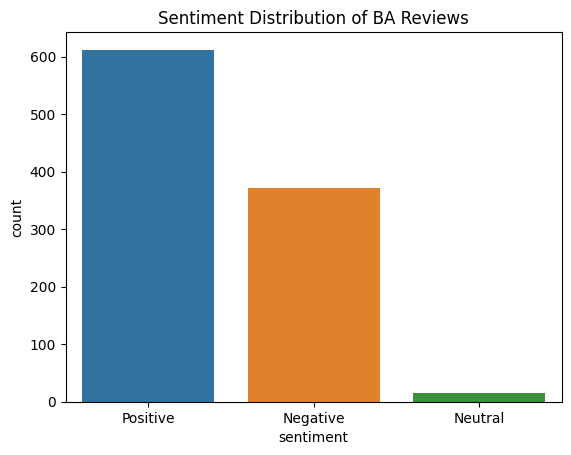

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution of BA Reviews")
plt.show()

In [13]:
# Count how many reviews fall into each sentiment category
counts = df['sentiment'].value_counts()

print(counts)

sentiment
Positive    612
Negative    372
Neutral      16
Name: count, dtype: int64


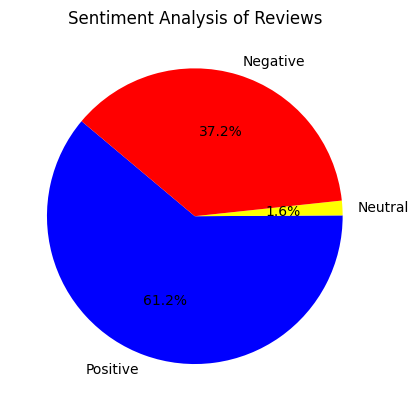

In [14]:
import matplotlib.pyplot as plt

sentiments = ['Positive', 'Neutral', 'Negative']
counts = [612, 16, 372]

plt.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=140, colors=['blue', 'yellow', 'red'])
plt.title('Sentiment Analysis of Reviews')
plt.show()


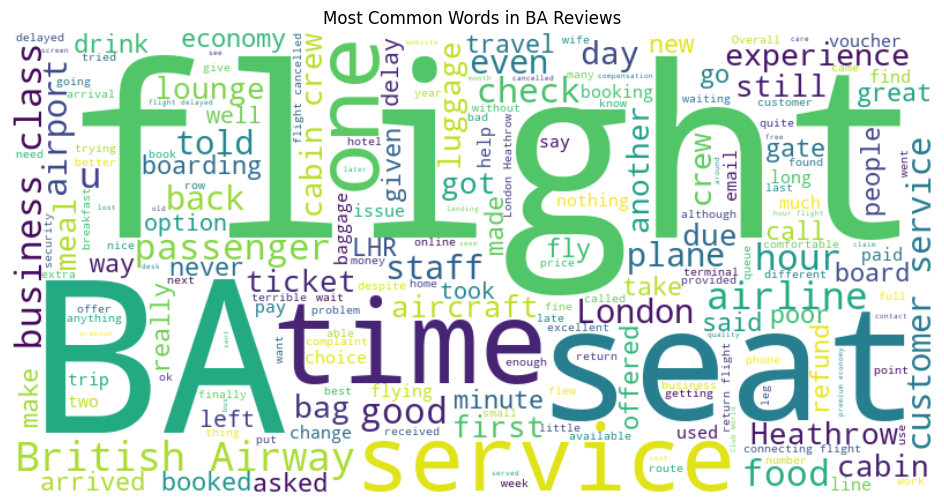

In [15]:
from wordcloud import WordCloud

all_words = ' '.join(df['clean_reviews'])
wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('data/wordcloud.png', dpi=300, bbox_inches='tight')
plt.title("Most Common Words in BA Reviews")
plt.show()

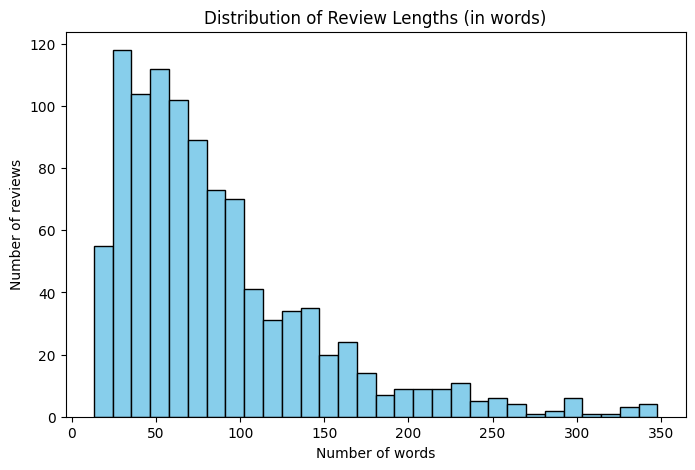

In [16]:
import matplotlib.pyplot as plt

# Assuming df['clean_reviews'] has the cleaned review text
df['review_length'] = df['clean_reviews'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
plt.hist(df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths (in words)')
plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.show()


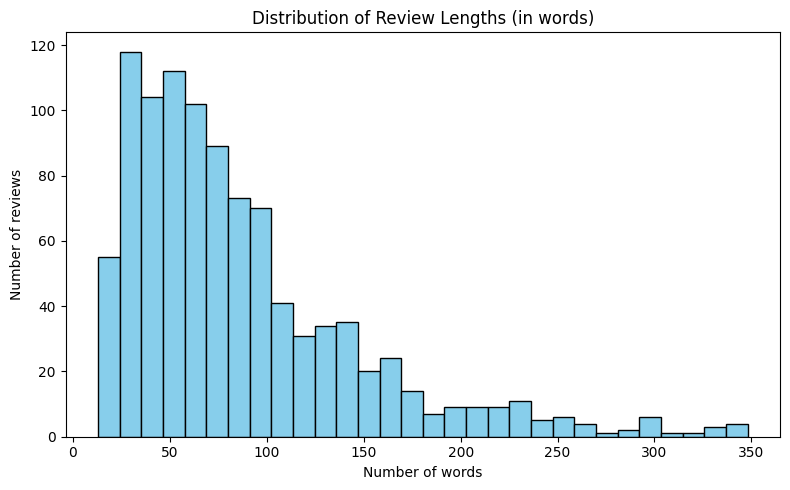

In [17]:
import matplotlib.pyplot as plt

# Calculate review length in words
df['review_length'] = df['clean_reviews'].apply(lambda x: len(x.split()))

# Plot histogram of review lengths
plt.figure(figsize=(8,5))
plt.hist(df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths (in words)')
plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.tight_layout()
plt.savefig('data/review_length_distribution.png')  # Save the plot as an image
plt.show()
